In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_data = pd.read_csv('sales所在周次节假日_剔除换货.csv')
all_data.rename(columns={'店铺名称':'store','地理位置指数':'position','年份':'years','周次':'weeks of year','是否包含法定节假日':'Isholiday','季节':'season','大类':'item','销量(剔除换货）':'sales','均价（剔除换货）':'prices','促销（剔除换货）':'discount'},inplace=True)
all_data['weeks'] = all_data['weeks of year']

a = all_data
week_5 = a.loc[lambda a : a['years'] == 2015]
week_6 = a.loc[lambda a : a['years'] == 2016]
week_6['weeks'] += 53
a = pd.concat([week_5,week_6])

from sklearn import preprocessing

#map店铺名称
name = a['store']
le = preprocessing.LabelEncoder()
le.fit(name)
list(name)
le.transform(name)
tmp = le.transform(name)
a['store'] = tmp

#map合并大类
category = a['item']
le.fit(category)
list(category)
le.transform(category)
tmp = le.transform(category)
a['item'] = tmp

#map季节
season = a['season']
le.fit(season)
list(season)
le.transform(season)
tmp = le.transform(season)
a['season'] = tmp

#a['sales'] = np.log1p(a.sales.values)
#a['prices'] = np.log1p(a.prices.values)

all_data = a

/home/lin/anaconda3/envs/boost/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [2]:
all_data.head()

,store,position,years,weeks of year,Isholiday,season,item,sales,prices,discount,weeks
0,0,7,2015,1,1,0,1,1,499.666700,0.333333,1
1,0,7,2015,1,1,0,2,30,513.066663,0.371160,1
2,0,7,2015,1,1,0,9,2,683.833300,0.325790,1
3,0,7,2015,1,1,0,10,2,799.600000,0.400000,1
4,0,7,2015,1,1,2,6,1,375.600000,0.400000,1


In [3]:
all_data.describe()

,store,position,years,weeks of year,Isholiday,season,item,sales,prices,discount,weeks
count,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.00000,18163.000000,18163.000000,18163.000000,18163.000000
mean,14.547156,5.501569,2015.552992,27.652701,0.185432,1.597864,5.41992,7.880031,399.822747,0.364135,56.961295
std,8.695615,2.597241,0.497198,15.181708,0.388658,1.048877,2.71015,16.436671,142.264912,0.089089,30.663260
min,0.000000,1.000000,2015.000000,1.000000,0.000000,0.000000,0.00000,1.000000,30.000000,0.032120,1.000000
25%,7.000000,7.000000,2015.000000,14.000000,0.000000,1.000000,3.00000,2.000000,307.981075,0.305955,31.000000
50%,14.000000,7.000000,2016.000000,28.000000,0.000000,2.000000,6.00000,4.000000,382.500000,0.368088,59.000000
75%,22.000000,7.000000,2016.000000,40.000000,0.000000,2.000000,7.00000,9.000000,459.225000,0.420665,84.000000
max,29.000000,7.000000,2016.000000,53.000000,1.000000,3.000000,11.00000,912.000000,1699.000000,0.902023,106.000000


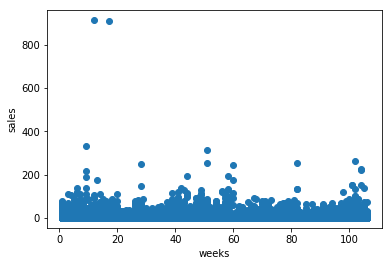

In [4]:
#a1 = all_data.loc[lambda all_data: all_data['店铺名称'] == '深圳前进天虹']
fig, ax1 = plt.subplots()
ax1.scatter(x = all_data['weeks'], y = all_data['sales'])
plt.ylabel('sales')
plt.xlabel('weeks')
plt.show()

In [5]:
outlier = all_data[lambda all_data: all_data['sales'] > 800]
outlier

,store,position,years,weeks of year,Isholiday,season,item,sales,prices,discount,weeks
2984,5,1,2015,17,0,1,3,908,359.635242,0.400000,17
5672,9,7,2015,12,0,2,6,912,259.052945,0.288006,12


In [6]:
all_data = all_data.drop([2984, 5672])
all_data.describe()

,store,position,years,weeks of year,Isholiday,season,item,sales,prices,discount,weeks
count,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000
mean,14.547987,5.501734,2015.553053,27.654149,0.185452,1.597875,5.420021,7.780684,399.832711,0.364137,56.965971
std,8.695708,2.597146,0.497191,15.181894,0.388675,1.048921,2.710236,13.437106,142.268598,0.089092,30.661699
min,0.000000,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,1.000000,30.000000,0.032120,1.000000
25%,7.000000,7.000000,2015.000000,14.000000,0.000000,1.000000,3.000000,2.000000,308.000000,0.305961,31.000000
50%,14.000000,7.000000,2016.000000,28.000000,0.000000,2.000000,6.000000,4.000000,382.500000,0.368088,59.000000
75%,22.000000,7.000000,2016.000000,40.000000,0.000000,2.000000,7.000000,9.000000,459.250000,0.420669,84.000000
max,29.000000,7.000000,2016.000000,53.000000,1.000000,3.000000,11.000000,331.000000,1699.000000,0.902023,106.000000


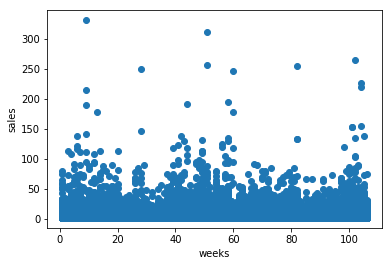

In [7]:
fig, ax2 = plt.subplots()
ax2.scatter(x = all_data['weeks'], y = all_data['sales'])
plt.ylabel('sales')
plt.xlabel('weeks')
plt.show()

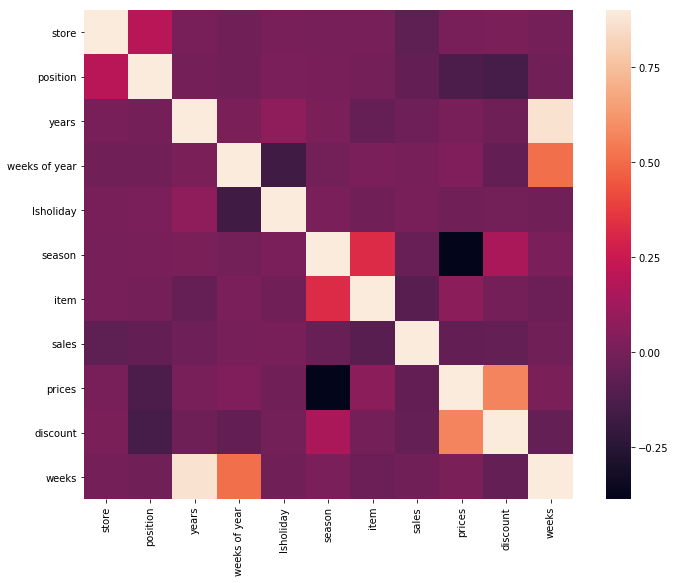

In [8]:
corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

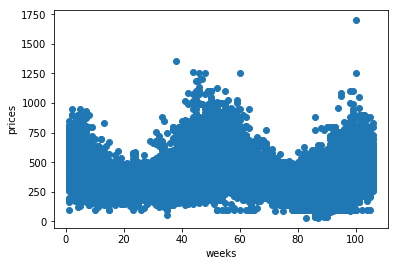

In [9]:
fig, ax1 = plt.subplots()
ax1.scatter(x = all_data['weeks'], y = all_data['prices'])
plt.ylabel('prices')
plt.xlabel('weeks')
plt.show()

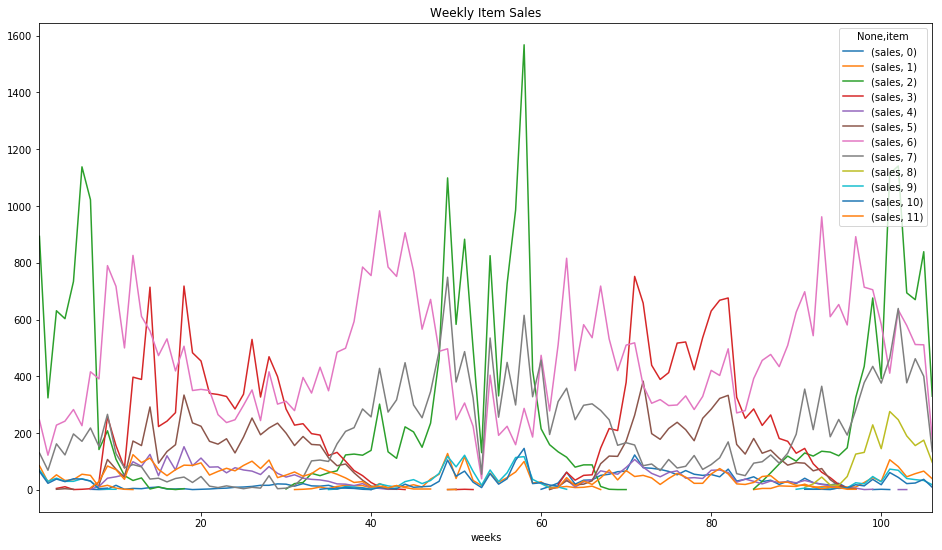

In [10]:
df = pd.DataFrame(all_data.groupby(['weeks','item']).sum()['sales']).unstack()
df.plot(figsize=(16,9),title = 'Weekly Item Sales')
plt.show()

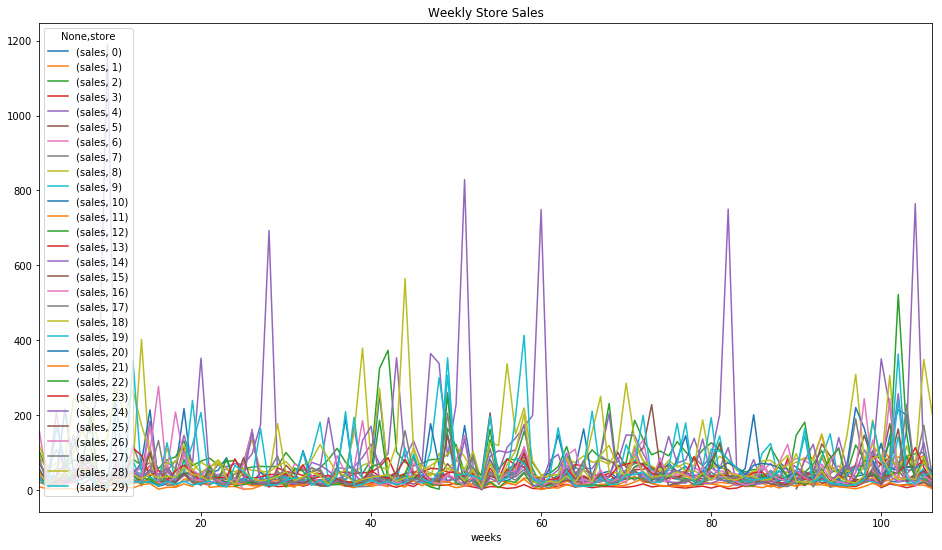

In [11]:
df_store = pd.DataFrame(all_data.groupby(['weeks','store']).sum()['sales']).unstack()
df_store.plot(figsize=(16,9),title='Weekly Store Sales')
#stores.sort_index(inplace = True)
#stores.plot(figsize=(16,9), title='Weekly Store Sales', legend=None)
plt.show()